In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from matplotlib import pyplot as plt 

df = pd.read_csv('house_prices_with_outliers.csv')
df.head()

,area,bedroom,price
0,1649,2,176093
1,1458,2,166568
2,1694,3,194465
3,1956,4,244831
4,1429,2,179966


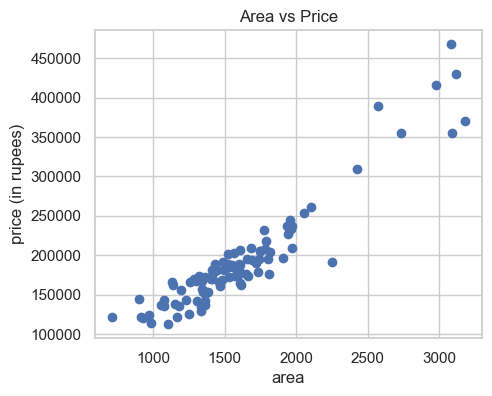

In [64]:
plt.figure(figsize=(5, 4))
plt.scatter(df['area'], df['price'])
plt.xlabel("area")
plt.ylabel("price (in rupees)")
plt.grid(True)
plt.title("Area vs Price")
plt.show()

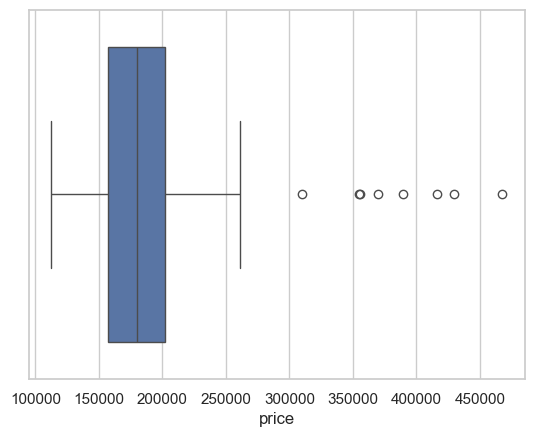

In [65]:
#now we will make boxplot to remove the outliers

sns.boxplot(x=df["price"])
plt.show()

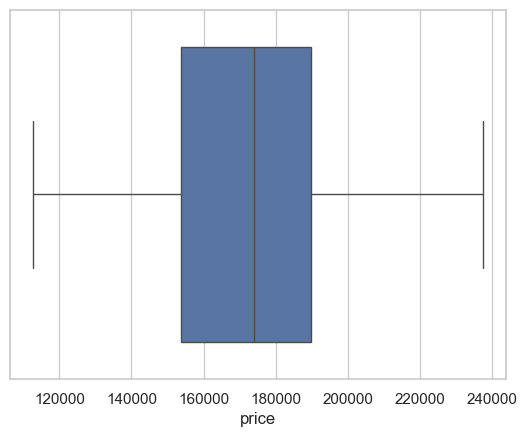

In [66]:
df = df[df["price"]<240000]
df = df.reset_index(drop=True)
sns.boxplot(x=df["price"]) #again we crossed check with box plot if any outlers present
plt.show()

In [67]:
#spiltiing the train and test data

X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modal = LinearRegression()
modal.fit(X_train, y_train)
y_predict = modal.predict(X_test)


In [68]:
#checking accuracy
from sklearn.metrics import r2_score
rmse = root_mean_squared_error(y_test, y_predict)
rmse
score = r2_score(y_test, y_predict)
score

##further checks on accuracy

average = df["price"].mean()
print(average)

accurate = rmse/average
print(accurate)

172558.06741573033
0.05003964277307475


In [70]:
##doing cross validation for further know whether our modal is overfitting or not

from sklearn.model_selection import cross_val_score

scores = cross_val_score(modal, X, y, cv=5, scoring='r2')
print("Cross-validated R2 scores:", scores)
print("Average R2:", scores.mean())

Cross-validated R2 scores: [0.91358637 0.84865984 0.83440257 0.92032877 0.56784145]
Average R2: 0.8169638001511668


In [71]:
##compare training vs test vs cross-validated R²:

print("Training R²:", modal.score(X_train, y_train))
print("Test R²:", modal.score(X_test, y_test))

Training R²: 0.8389726860704005
Test R²: 0.8955295973483604
